In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import numpy as np
import random
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter
from scipy.stats import norm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style("darkgrid")

2.6706211443061187
-0.0006732189544829563
6.94709962516547


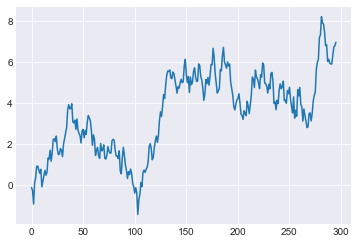

In [73]:
#### Reading in Euro/Dollar Exchange Quotes
sp = pd.read_csv("eurcsv.csv")

#Defining Dates and Closing Prices
close = sp['Price']
date = sp['Date']

def tester(date_in,price_in,technical):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    twenty_six = price_in.ewm(span=26).mean()
    twelve = price_in.ewm(span=12).mean()
    macd = twelve - twenty_six
    delta_macd = macd.pct_change(periods=2)

    for i in range(len(price_in)-1):
        if macd[i] > technical:
            buys.append(i)
    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    
#    plt.plot(np.cumsum(rets))
    total_return = np.cumsum(rets)
    end_return = total_return[-1]
    return end_return, rets
            
tester(date,close,0)


def random_walker(n):
    starter = [0]
    
    x_start, indicator = tester(date,close,starter[-1])
    print(x_start)

    for i in range(n):
        test_x = np.random.uniform(-1,1)/300
        random_return, indicator = tester(date,close,test_x)
        test_return, notimportant = tester(date,close,starter[-1])
        if random_return > test_return:
            starter.append(test_x)
    print(starter[-1])
    x,y = tester(date,close,starter[-1])
    print(x)
    plt.plot(np.cumsum(y))
            
            
         
random_walker(100)

In [2]:
#Reading in Euro/Dollar Exchange Quotes
sp = pd.read_csv("eurcsv.csv")

#Defining Dates and Closing Prices
close = sp['Price']
date = sp['Date']


def tester(date_in,price_in):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    twenty_six = price_in.ewm(span=26).mean()
    twelve = price_in.ewm(span=12).mean()
    macd = twelve - twenty_six
    delta_macd = macd.pct_change(periods=2)
    mix = []
    mix_port = []

    for i in range(len(price_in)-1):
        if macd[i] > 0.0 or delta_macd[i] < -.75:
            buys.append(i)
            mix.append(i)
        elif delta_macd[i] < -.15 or macd[i] < -.003:
            shorts.append(i)
            mix.append(i)
    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    for i in shorts:
        s = int(i)
        s1 = int(i+1)
        s_returns = ((price_in[s1] - price_in[s])/price_in[s])*-100
        s_rets.append(s_returns)
#    for i in mix:
#        j = int(i)
#        j1 = int(i+1)
#        mix_return = ((price_in[j1] - price_in[j])/price_in[j])*100
#        mix_port.append(mix_return)        
        
    for i in range(len(price_in)-1):
        z = int(i)
        z1 = int(i+1)
        base = ((price_in[z1] - price_in[z])/price_in[z])*100
        benchmark.append(base)
    x_bench = np.linspace(0,1,len(benchmark))
    x_strat = np.linspace(0,1,len(rets))   
    x_short = np.linspace(0,1,len(s_rets))
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(x_strat, np.cumsum(rets),label="Long Strategy")
    ax.plot(x_bench, np.cumsum(benchmark),label="Benchmark")
    ax.plot(x_short, np.cumsum(s_rets),label="Short Strategy")
#    ax2 = ax.twinx()
#    ax2.plot(np.linspace(0,1,len(macd)), macd, 'r')
    ax.yaxis.set_major_formatter(PercentFormatter())    
    ax.legend(fontsize=15)
    print("Strategy Return = %",sum(rets))
    print("Total Return Outright = %",sum(benchmark))
    
    #RISK ASSESMENT BENCHMARK
    delta_returns = price_in.pct_change()
    mean_returns = np.mean(delta_returns)
    std_returns = np.std(delta_returns)
    VAR_95 = norm.ppf(1-0.95,mean_returns, std_returns)*100
    print("Benchmark VAR @ confidence Level = 95% Level", VAR_95)
    
    #RISK ASSESMENT STRATEGY
    #delta_returns_strat = price_in.pct_change()
    mean_returns_strat = np.mean(rets)
    std_returns_strat = np.std(rets)
    VAR_95_strat = norm.ppf(1-0.95,mean_returns_strat, std_returns_strat)
    print("Strategy VAR @ confidence Level = 95% Level", VAR_95_strat)
    

Strategy Return = % 4.27947568859152
Total Return Outright = % -2.3431411707984164
Benchmark VAR @ confidence Level = 95% Level -0.76299255408721
Strategy VAR @ confidence Level = 95% Level -0.7137476109944961


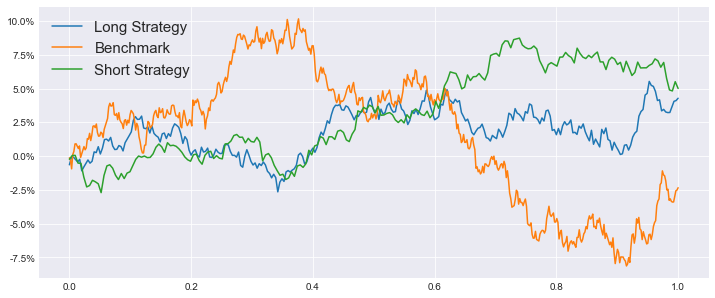

In [3]:
tester(date,close)

NameError: name 'macd' is not defined

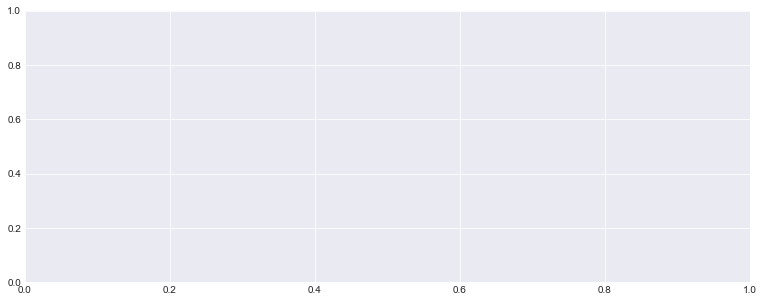

In [4]:
date = pd.to_datetime(sp['Date'])
fig, ax1 = plt.subplots(figsize=(13,5))
ax1.plot(date, macd, 'b-')
ax2 = ax1.twinx()
ax2.plot(date, close, 'r')
ax2.set_ylabel(color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()